In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
EPOCHS = 10
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43
TEST_SIZE = 0.4
filename = "traffic.h5"
data_dir = r"traffic_signs"

In [3]:
def load_data(data_dir):
   # loading data and labels
    images = []
    labels = []
    
    # joining data_dir path and folder paths
    for dir in os.listdir(data_dir):
        folder = os.path.join(data_dir, dir)
        
        # message
        if os.path.isdir(folder):
            print(f"Loading files from {folder}")
        
        # looking for images in folders
        for file in os.listdir(folder):
            # reading and resizing images
            img = cv.imread(os.path.join(folder, file))
            img = cv.resize(img, (IMG_WIDTH, IMG_HEIGHT))
            
            # appending lists
            images.append(img)
            labels.append(int(dir))
            
    # returning lists        
    return images, labels

In [4]:
def get_model():
    # defining model
    model = tf.keras.models.Sequential([
        
        # adding convolutional layer with 32 filters by 3x3 kernal
        tf.keras.layers.Conv2D(32, (3,3), activation="sigmoid", input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        
        # adding max_pooling layer with pool size 2x2
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
        # flattening all the units with dropout with 30%
        tf.keras.layers.Flatten(),
        
        # adding hidden layer with 128 units with 50% dropout
        tf.keras.layers.Dense(256, activation="sigmoid"),
        tf.keras.layers.Dropout(0.5),
        
        # adding output layer with 10 units to get probablity for 10 digits with softmax activation fn
        tf.keras.layers.Dense(NUM_CATEGORIES, activation="softmax")
    ])
    
    # compiling model
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    # getting model summary
    model.summary()
    return model

In [5]:
# getting data
images, labels = load_data(data_dir)

# converting integer labeles to binary matrices to use categorical_crossentropy loss fn
labels = tf.keras.utils.to_categorical(labels)

# performing train test split
x_train, x_test, y_train, y_test =  train_test_split(np.array(images), np.array(labels), test_size=TEST_SIZE)

Loading files from traffic_signs\0
Loading files from traffic_signs\1
Loading files from traffic_signs\10
Loading files from traffic_signs\11
Loading files from traffic_signs\12
Loading files from traffic_signs\13
Loading files from traffic_signs\14
Loading files from traffic_signs\15
Loading files from traffic_signs\16
Loading files from traffic_signs\17
Loading files from traffic_signs\18
Loading files from traffic_signs\19
Loading files from traffic_signs\2
Loading files from traffic_signs\20
Loading files from traffic_signs\21
Loading files from traffic_signs\22
Loading files from traffic_signs\23
Loading files from traffic_signs\24
Loading files from traffic_signs\25
Loading files from traffic_signs\26
Loading files from traffic_signs\27
Loading files from traffic_signs\28
Loading files from traffic_signs\29
Loading files from traffic_signs\3
Loading files from traffic_signs\30
Loading files from traffic_signs\31
Loading files from traffic_signs\32
Loading files from traffic_signs

In [6]:
# getting model
model = get_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 256)               1605888   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 43)                11051     
                                                        

In [7]:
# training model
model.fit(x_train, y_train, epochs=EPOCHS)

Epoch 1/10
500/500 [==============================] - 8s 14ms/step - loss: 2.3333 - accuracy: 0.3909
Epoch 2/10
500/500 [==============================] - 7s 14ms/step - loss: 0.4958 - accuracy: 0.8823
Epoch 3/10
500/500 [==============================] - 7s 14ms/step - loss: 0.2146 - accuracy: 0.9556
Epoch 4/10
500/500 [==============================] - 7s 14ms/step - loss: 0.1214 - accuracy: 0.9772
Epoch 5/10
500/500 [==============================] - 7s 14ms/step - loss: 0.0880 - accuracy: 0.9838
Epoch 6/10
500/500 [==============================] - 7s 14ms/step - loss: 0.0692 - accuracy: 0.9860
Epoch 7/10
500/500 [==============================] - 7s 14ms/step - loss: 0.0547 - accuracy: 0.9905
Epoch 8/10
500/500 [==============================] - 7s 15ms/step - loss: 0.0332 - accuracy: 0.9956
Epoch 9/10
500/500 [==============================] - 7s 14ms/step - loss: 0.0373 - accuracy: 0.9931
Epoch 10/10
500/500 [==============================] - 8s 15ms/step - loss: 0.0340 - accura

In [8]:
# Evaluating the model
model.evaluate(x_test,  y_test, verbose=2)

333/333 - 2s - loss: 0.0573 - accuracy: 0.9850 - 2s/epoch - 5ms/step


[0.05732319876551628, 0.9849849939346313]

In [9]:
# saving the model
model.save(filename)
print(f"Model saved to {filename}.")

Model saved to traffic.h5.


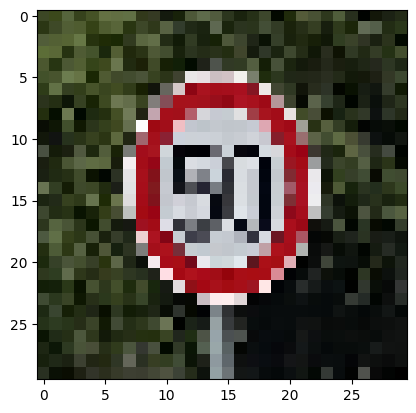

(30, 30, 3)


In [31]:
# loading saved model
loaded_model = tf.keras.models.load_model(r"traffic.h5")
img = cv.imread(r"test_img.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (30, 30))
plt.imshow(img)
plt.show()
print(img.shape)

In [32]:
img = np.expand_dims(img, axis=0)
prediction = loaded_model.predict(img)
prediction = labels[np.argmax(prediction)]

1/1 [==============================] - 0s 106ms/step


In [33]:
# creating a function to preprocess test image and give predictions
def predict(image):
    # preprocessing
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image = cv.resize(image, (30, 30))
    image = np.expand_dims(image, axis=0)
    prediction = loaded_model.predict(image)
    # getting the highest probablity
    prediction = labels[np.argmax(prediction)]
    
    return prediction

In [34]:
test_image = cv.imread(r"test_img.jpg")
predict(test_image)

1/1 [==============================] - 0s 34ms/step


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [35]:
loaded_model.predict(img)

1/1 [==============================] - 0s 37ms/step


array([[9.2819755e-05, 7.5675605e-04, 3.1945172e-03, 3.4325055e-04,
        1.0505070e-02, 2.2476653e-02, 2.4390256e-03, 3.8926613e-02,
        3.3705770e-03, 1.9596710e-03, 3.4122325e-02, 2.5938606e-02,
        5.4830605e-01, 2.1332658e-03, 4.9278431e-04, 3.1147883e-03,
        8.6007186e-04, 2.5401392e-03, 7.3858355e-03, 4.9223516e-02,
        1.2436059e-02, 9.2538819e-03, 7.0363982e-04, 8.7791355e-03,
        2.3763282e-03, 5.4574744e-03, 3.0645439e-02, 2.4748927e-03,
        2.7583694e-04, 3.3268004e-03, 4.7979743e-04, 2.9600591e-03,
        1.3830564e-03, 2.5791850e-02, 1.3308160e-03, 1.2158466e-03,
        6.6571361e-03, 5.2210097e-03, 1.7157210e-03, 7.5908643e-03,
        9.1840930e-02, 3.8053265e-03, 1.6095757e-02]], dtype=float32)